In [0]:
import pandas
import numpy as np

In [0]:
df = pandas.read_excel('2010 Federal STEM Education Inventory Data Set.xls')

In [0]:
new_df = df.filter(['Unnamed: 5','Unnamed: 6'], axis=1)


In [0]:
new_df.replace(np.nan, 0, inplace=True)
df.replace(np.nan, 0, inplace=True)

In [0]:
f2008 = list(new_df['Unnamed: 5'])
f2009 = list(new_df['Unnamed: 6'])

In [0]:
percent_growth = []
target = []
for i in range(1,len(f2008)):
    if f2009[i] == 0:
        percent_growth.append(-9999)
        target.append(0)
        continue
    growth = (f2009[i]-f2008[i])/f2009[i]
    percent_growth.append(growth*100)
    if growth > 0:
        target.append(1)
    else:
        target.append(0)

In [0]:
new_df.drop('Index Number', inplace=True)

In [0]:
new_df['% growth'] = percent_growth
new_df['target'] = target

In [0]:
new_df

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df2 = df.drop(['PROGRAM', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'FUNDING' ], axis=1)
df2.drop('Index Number', inplace=True)

In [25]:
df2.shape

(253, 247)

In [0]:
 df3 = pandas.DataFrame({col: df2[col].astype('category').cat.codes for col in df2}, index=df2.index)

In [0]:
df3.reset_index(drop=True,inplace=True)
new_df.reset_index(drop=True,inplace=True)

In [0]:
total_len = len(df3.columns)

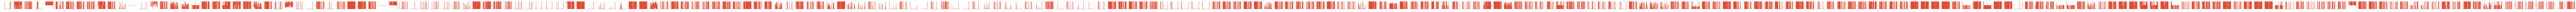

In [36]:
fig = plt.figure(figsize=(400,400))
'''
plt.subplot(3, 3, 1)
plt.plot(df3.index, df3[df3.columns[99]], '-' )

plt.subplot(3, 3, 2)
plt.plot(df3.index, df3[df3.columns[100]], '-' )

plt.subplot(3, 3, 3)
plt.plot(df3.index, df3[df3.columns[34]], '-' )
plt.subplot(3, 3, 4)
plt.plot(df3.index, df3[df3.columns[89]], '-' )
plt.show()
'''

for i in range(1,total_len+1):
    plt.subplot(total_len, total_len, i)
    plt.plot(df3.index, df3[df3.columns[i-1]], '-')
    plt.axis('off')
plt.show()

In [60]:
df3.shape

(253, 247)

In [0]:

df4 = pandas.concat([df3, new_df], axis=1)



In [0]:
features = df4.drop('target', axis=1)

In [0]:
labels = df4['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [102]:
X_test.shape

(76, 250)

In [0]:
from sklearn import tree

In [0]:
clf_dt = tree.DecisionTreeClassifier()


In [129]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
predicted_y = clf_dt.predict(X_test)

In [131]:
clf_dt.score(X_test, y_test)

0.9736842105263158

In [0]:
from sklearn.metrics import mutual_info_score, roc_auc_score

In [0]:
score = mutual_info_score(y_test, predicted_y)

In [0]:
score2 = roc_auc_score(y_test, predicted_y)

In [161]:
score2

0.9795918367346939

In [177]:
X_train['Unnamed: 5'] = X_train['Unnamed: 5'].astype(float)
X_train['Unnamed: 6'] = X_train['Unnamed: 6'].astype(float)
X_test['Unnamed: 5'] = X_test['Unnamed: 5'].astype(float)
X_test['Unnamed: 6'] = X_test['Unnamed: 6'].astype(float)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [178]:
from xgboost.sklearn import XGBRegressor
import scipy.stats as st
from sklearn.model_selection import GridSearchCV

params = {  
    'max_depth': [5,10,15],
    'n_estimators': [50,100,150]
}

xr = XGBRegressor() 

gs = GridSearchCV(xr, params, n_jobs=1,verbose=1)  
gs.fit(X_train, y_train)  
gs.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.3s finished


{'max_depth': 5, 'n_estimators': 150}

In [0]:
xgb_predict = gs.predict(X_test)

In [0]:
xg_pre = []
for i in range(len(xgb_predict)):
  if xgb_predict[i]>0.49:
    xg_pre.append(1)
  else:
    xg_pre.append(0)

In [0]:
xg_pre = np.array(xg_pre)

In [184]:
gs.score(X_test, y_test)

0.8851282181775705

In [185]:
roc_auc_score(y_test, xg_pre)

0.9795918367346939